In [1]:
""" Functions for generating 2D grid maps, for AI Lab 2 - path planning.
"""

import random
import numpy as np
import matplotlib.pyplot as plt

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):

    '''Generates a random 2d map with obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    '''
    
    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.random_integers(0, size_x-1,2), np.random.random_integers(0, size_y-1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3
    
    print('start',map2d[xloc[0]][yloc[0]], 'Goal', map2d[xloc[1]][yloc[1]]  )
    print('start',xloc[0], yloc[0], 'Goal', xloc[1], yloc[1])
    

    return map2d

In [2]:
# Generate 2d grid map with rotated-H-shape object
def generateMap2d_obstacle(size_):
    '''Generates a random 2d map with a rotated-H-shape object in the middle and obstacles (small blocks) randomly distributed. 
       You can specify any size of this map but your solution has to be independent of map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid map, e.g. [60, 60]. The height and width of the map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid map, cells with a value of 0: Free cell; 
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;
                                            
       [ytop, ybot, minx] : list
           information of the rotated-H-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall 
    '''
    
    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d==-2] = 0
    map2d[map2d==-3] = 0

    # add special obstacle
    xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
    ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
    xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3, size_x-5)
    ybot = np.random.random_integers(5, size_y//5 - 3)


    map2d[ybot, xbot[0]:xbot[1]+1] = -1
    map2d[ytop, xtop[0]:xtop[1]+1] = -1
    minx = (xbot[0]+xbot[1])//2
    maxx = (xtop[0]+xtop[1])//2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx+1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]

    map2d[goalp[1],goalp[0]] = -3
    #return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx]

In [3]:
# helper function for plotting the result
def plotMap(map2d_, path_=None, title_ =''):
    
    '''Plots a map (image) of a 2d matrix with a path from start point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''
    
    import matplotlib.cm as cm
    plt.interactive(False)
    
    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)
    
    
    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [0.8, 0.4, 0.1, 0.5]  # white

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_>0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]]-1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]
                
    if  path_ is not None: path = path_.T.tolist()
    
    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    if  path_ is not None:plt.plot(path[:][0],path[:][1], color='magenta',linewidth=2.5)
    plt.show()



C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 4 43 Goal 28 53


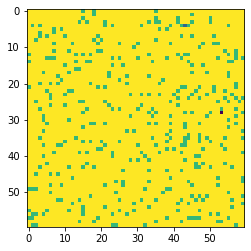

start -2.0 Goal -3.0
start 17 52 Goal 42 37
map info: 
y top:  45
t bot:  8
x wall:  29


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.random_integers(7*size_y//10 + 3, size_y - 5)
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:35: DeprecationWarning: This function is deprecated. Please call randint(3, 13 + 1) instead
  xbot = np.random.random_integers(3, 3*size_x//10-5), np.random.random_integers(7*size_x//10+3

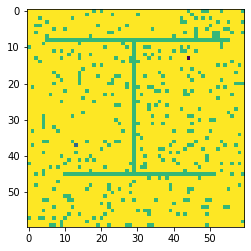

In [4]:
# create a map with obstacles randomly distributed
#  0 - Free cell
# -1 - Obstacle
# -2 - Start point
# -3 - Goal point
_map_ = generateMap2d([60, 60])
plt.clf()
plt.imshow(_map_)
plt.show()

# map with rotated-H shape obstacle and obstacles randomly distributed
map_h_object, info = generateMap2d_obstacle([60, 60])

# environment information
print("map info: ")
print("y top: ", info[0])
print("t bot: ", info[1])
print("x wall: ", info[2])

plt.clf()
plt.imshow(map_h_object)
plt.show()


# example for a solved_map
#  0 - unexpanded cell
# -1 - obstacle
# -2 - start point
# -3 - goal point
# positive_numbers - one type of the values described in lab2 description (heuristic cost, travel cost, cell total cost,...)


In [5]:
# import numpy as np
import math
import heapq

# Priority Queue based on heapq
class PriorityQueue:
    def __init__(self):
        self.elements = []
    def isEmpty(self):
        return len(self.elements) == 0
    def add(self, priority, item):
        heapq.heappush(self.elements,(priority,item))
    def remove(self):
        return heapq.heappop(self.elements)[1]

In [6]:
def get_neighbors(current,map1):
    x,y =current
    adjacent_cells=[]
    
    shift = [[-1, 0 ], # go up
            [ 0, -1], # go left
            [ 1, 0 ], # go down
            [ 0, 1 ]] # go right
    
    
    for i in range(len(shift)):
        x1 = x + shift[i][0]
        y1 = y + shift[i][1]
        
        #check if outside the boundary
        if x1 >= 0 and x1 < len(map1) and y1 >=0 and y1 <len(map1[0]):
            #move to adjacent cell if only its value is zero
            if map1[x1][y1] == 0 or map1[x1][y1]==-3 :
                adjacent_cells.append([x1, y1])
    return adjacent_cells


In [7]:

# An example of search algorithm, feel free to modify and implement the missing part
#def bfs_search(map1, start, goal):
def bfs_search(map1):

    exp_map = np.copy(map1)
    for row in range(len(map1)):
        for column in range(len(map1)):
            if map1[row][column]==-2:
                xs, ys= row,column
                #print('start position : x', xs, 'y', ys)
                
            if map1[row][column]==-3:
                xg, yg= row,column
                #print('Goal position : x', xg, 'y', yg)
                
                
    
    start_position=[xs, ys]
    goal_position=[xg, yg]
    
    cost1=0
    # set to store visited cells
    visited=[]
    # Boolean found if goal is reached
    found=False

    # open list
    frontier = PriorityQueue()
    # path taken
    came_from=dict()
    g=0
    
    # add starting cell to open list
    frontier.add(cost1, start_position)
    #start.parent = None
    #start.g = 0 
    
    # if there is still nodes to open
    while not frontier.isEmpty():
        current = frontier.remove()
        #add the visited cell to the set() visited
        visited.append(start_position)
        came_from[(xs,ys)]=tuple(current)
        
        # check if the goal is reached
        g+=1
        if current == goal_position:
            found=True
            break
        
        # for each neighbour of the current cell
        # Implement get_neighbors function (return nodes to expand next)
        # (make sure you avoid repetitions!)
        cells=get_neighbors(current, map1)
        for next1 in cells:
            if next1 not in visited:
                visited.append(next1)
                # compute cost to reach next cell
                # Implement cost function
                x,y=next1
                cost1+=1
                if exp_map[x][y]!=-3:exp_map[x][y]=cost1

                # add next cell to open list
                frontier.add(cost1, next1)
            
                # add to path
                came_from[(x,y)]=tuple(current)
                #if next1 not in came_from:came_from.append(next1)
    
    
    if found==False: 
        print("No path to goal")
        return -1
    else:
        a,b=goal_position
        goal_position2=b,a
        reverse_path = [goal_position2]
        while tuple(goal_position) != tuple(start_position):
            goal_position = came_from[tuple(goal_position)]
            x2,y2=goal_position
            reverse_path.append((y2,x2))
            path2=list(reversed(reverse_path))
        
        path1=np.array(path2)
        plotMap(map1)
        plotMap(exp_map, path1,'path')
        return cost1, len(path1)

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 24 11 Goal 37 37


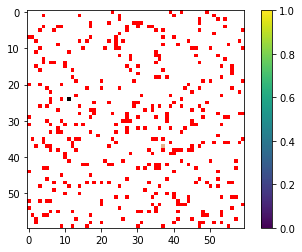

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


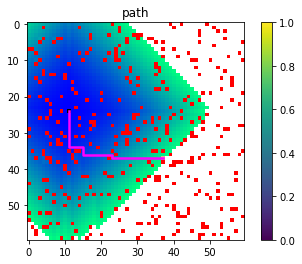

(1926, 40)

In [8]:
map1 = generateMap2d([60, 60])
bfs_search(map1)

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.random_integers(7*size_y//10 + 3, size_

start -2.0 Goal -3.0
start 20 19 Goal 50 18


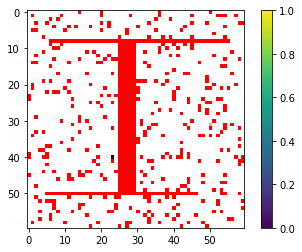

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


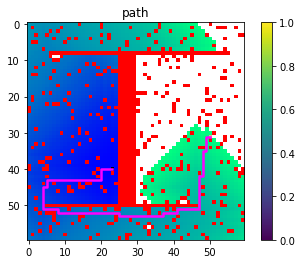

(2160, 101)

In [9]:
map2, info=generateMap2d_obstacle([60, 60])
bfs_search(map2)

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]


start -2.0 Goal -3.0
start 23 22 Goal 16 52


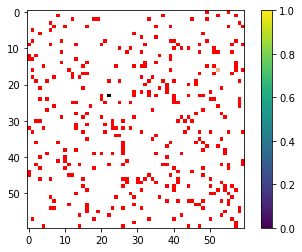

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


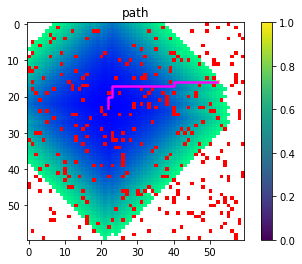

start -2.0 Goal -3.0
start 27 27 Goal 39 34


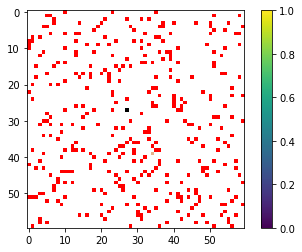

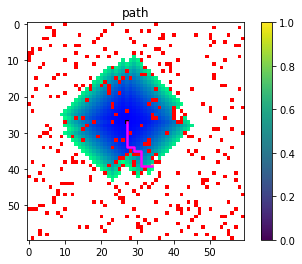

start -2.0 Goal -3.0
start 20 5 Goal 41 14


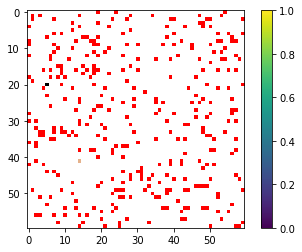

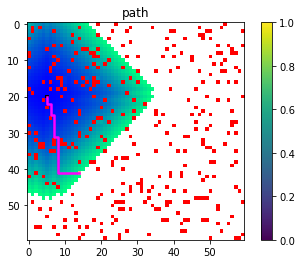

start -2.0 Goal -3.0
start 49 45 Goal 8 49


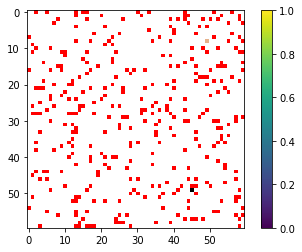

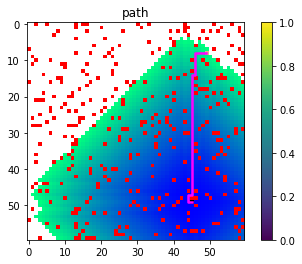

start -2.0 Goal -3.0
start 22 48 Goal 4 5


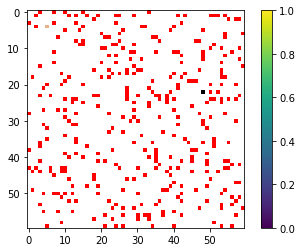

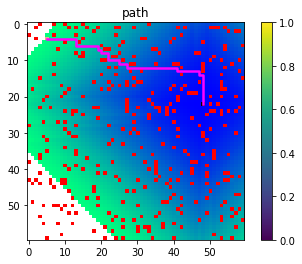

start -2.0 Goal -3.0
start 55 51 Goal 57 7


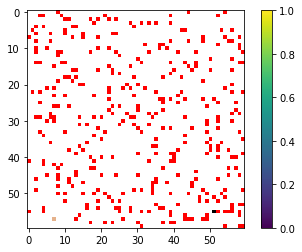

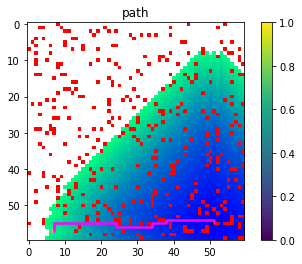

start -2.0 Goal -3.0
start 40 51 Goal 37 42


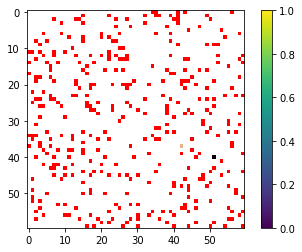

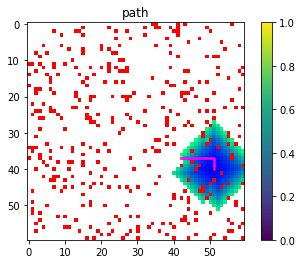

start -2.0 Goal -3.0
start 9 20 Goal 38 16


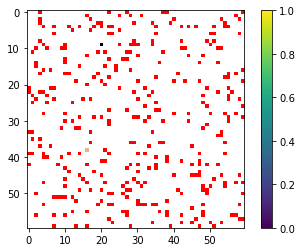

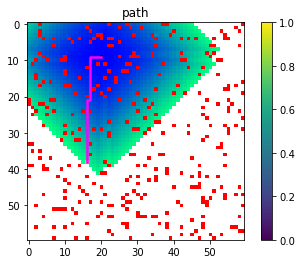

start -2.0 Goal -3.0
start 51 44 Goal 27 23


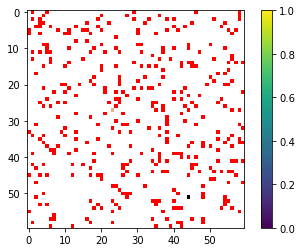

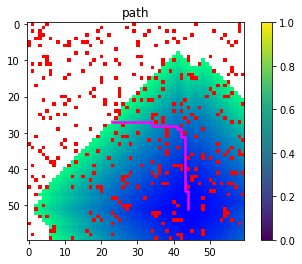

start -2.0 Goal -3.0
start 13 23 Goal 59 8


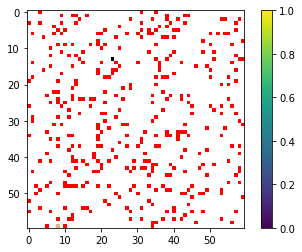

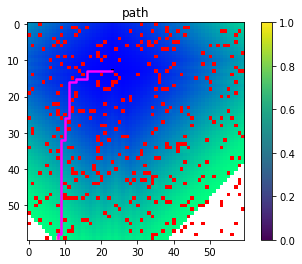

start -2.0 Goal -3.0
start 18 15 Goal 32 45


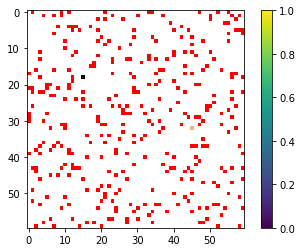

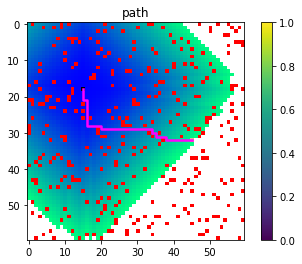

start -2.0 Goal -3.0
start 53 32 Goal 1 32


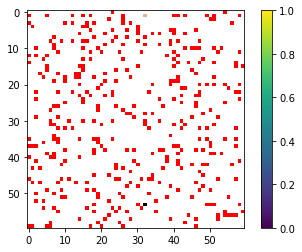

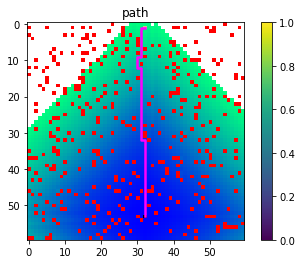

start -2.0 Goal -3.0
start 59 42 Goal 32 21


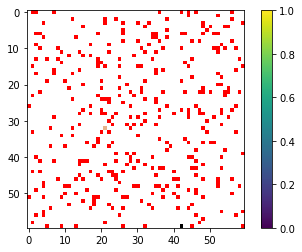

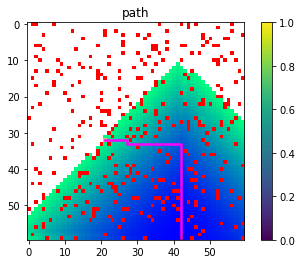

start -2.0 Goal -3.0
start 28 8 Goal 40 12


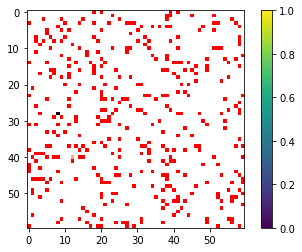

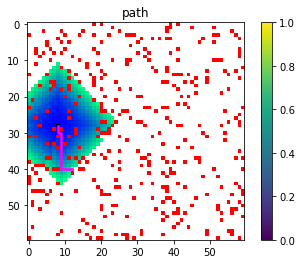

start -2.0 Goal -3.0
start 34 43 Goal 33 28


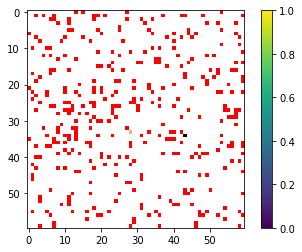

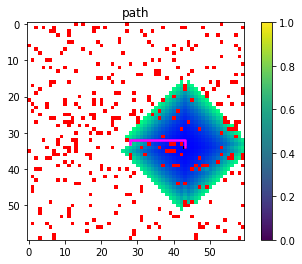

start -2.0 Goal -3.0
start 47 11 Goal 51 41


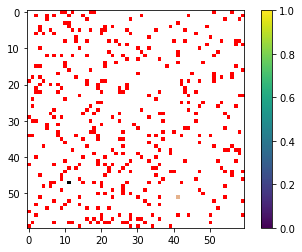

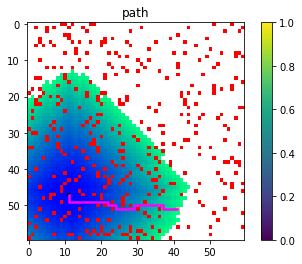

start -2.0 Goal -3.0
start 4 31 Goal 26 45


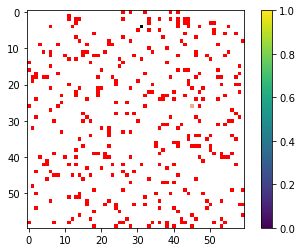

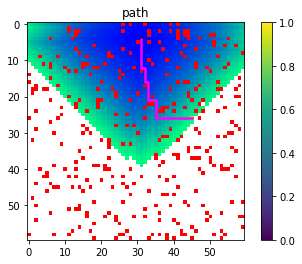

start -2.0 Goal -3.0
start 45 50 Goal 34 9


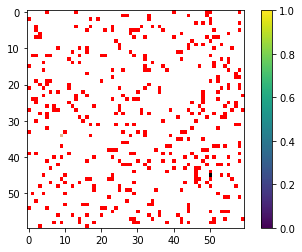

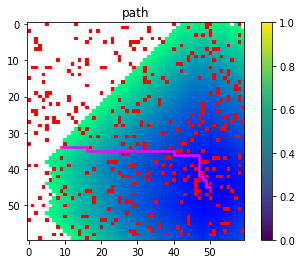

start -2.0 Goal -3.0
start 11 54 Goal 35 36


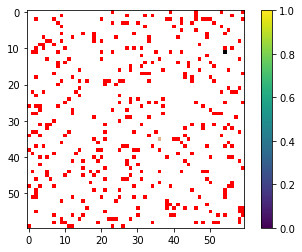

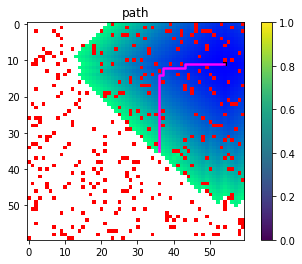

start -2.0 Goal -3.0
start 44 4 Goal 22 0


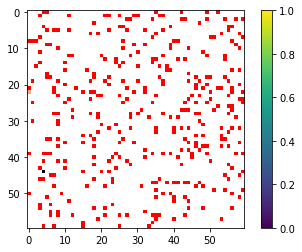

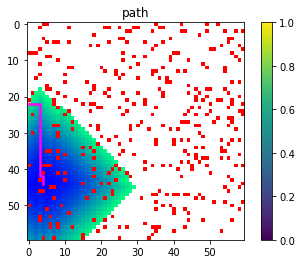

[2163, 672, 1039, 2093, 2938, 1712, 272, 1372, 1863, 2992, 2280, 2560, 1721, 442, 642, 1346, 1444, 2263, 1448, 743]
[38, 20, 31, 48, 62, 51, 13, 34, 46, 62, 45, 57, 49, 17, 19, 37, 37, 53, 43, 27]
[0.8505270481109619, 0.4240434169769287, 0.5241444110870361, 0.7519218921661377, 1.1333696842193604, 0.666644811630249, 0.38451480865478516, 0.5365979671478271, 0.713392972946167, 1.1668503284454346, 0.8655524253845215, 0.9333322048187256, 0.6666653156280518, 0.48337340354919434, 0.44986677169799805, 0.683459997177124, 0.7181262969970703, 0.8640053272247314, 0.6440155506134033, 0.5685703754425049]
1600.25
39.45
0.7014487504959106
784.3613245819812
14.42731783804599
0.2128421280663806


In [10]:
import time
import numpy
expanded_nodes=[]
path_length=[]
time_taken=[]

for i in range(20):
    map1 = generateMap2d([60, 60])
    start=time.time()
    exp_cntr, path_bfs=bfs_search(map1)
    stop=time.time()
    expanded_nodes.append(exp_cntr)
    path_length.append(path_bfs)
    timed=stop-start
    time_taken.append(timed)
    
expanded_nodes_mean= numpy.mean(expanded_nodes)
path_mean= numpy.mean(path_length)
time_mean= numpy.mean(time_taken)
expanded_nodes_std_dev = numpy.std(expanded_nodes)
path_mean_std_dev= numpy.std(path_length)
time_mean_std_dev= numpy.std(time_taken)

print(expanded_nodes)
print(path_length)
print(time_taken)
print(expanded_nodes_mean)
print(path_mean)
print(time_mean)
print(expanded_nodes_std_dev)
print(path_mean_std_dev)
print(time_mean_std_dev)



start -2.0 Goal -3.0
start 22 4 Goal 7 45


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.random_integers(7*size_y//10 + 3, size_

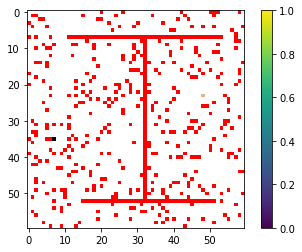

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


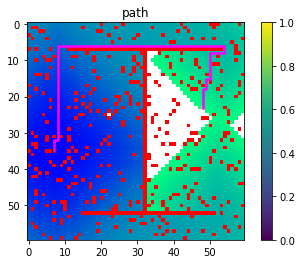

(2805, 100)

In [11]:
map2, info=generateMap2d_obstacle([60, 60])
bfs_search(map2)

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1458891613.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 59 + 1) instead
  yloc, xloc = [np.random.random_integers(0, size_x-1, 2), np.random.random_integers(0, size_y-1, 2)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(5, 16 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:33: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  xtop = [np.random.random_integers(5, 3*size_x//10-2), np.random.random_integers(7*size_x//10+3, size_x-5)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:34: DeprecationWarning: This function is deprecated. Please call randint(45, 55 + 1) instead
  ytop = np.random.random_integers(7*size_y//10 + 3, size_

start -2.0 Goal -3.0
start 55 17 Goal 1 8


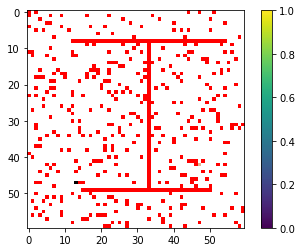

C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\1972512899.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if colorsMap2d[irow][icol] == []:


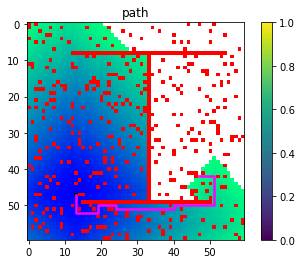

start -2.0 Goal -3.0
start 46 17 Goal 1 20


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 51 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 51 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


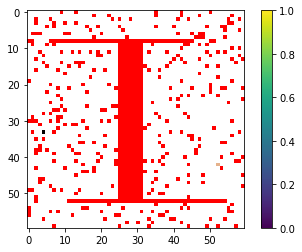

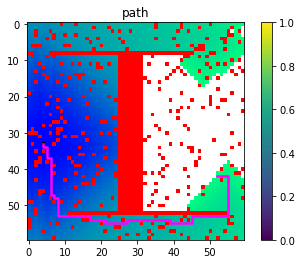

start -2.0 Goal -3.0
start 34 36 Goal 49 30


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(6, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(6, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


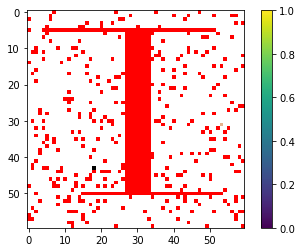

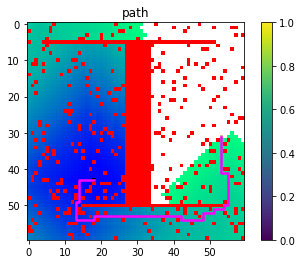

start -2.0 Goal -3.0
start 6 20 Goal 57 45


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


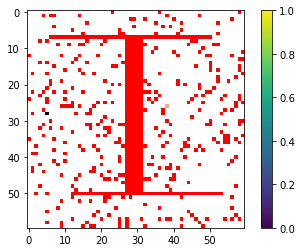

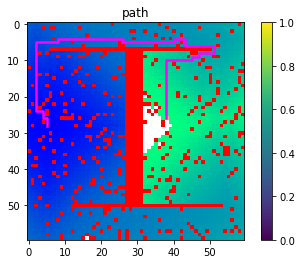

start -2.0 Goal -3.0
start 2 23 Goal 32 57


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 52 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 52 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


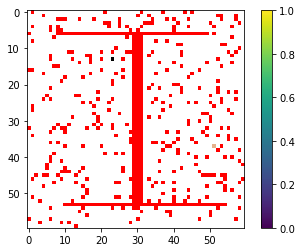

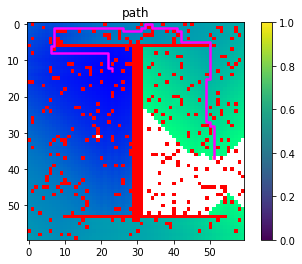

start -2.0 Goal -3.0
start 32 56 Goal 17 8


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 54 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 54 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


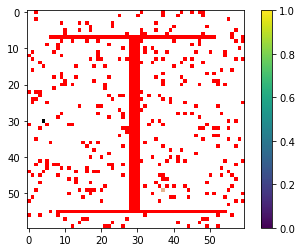

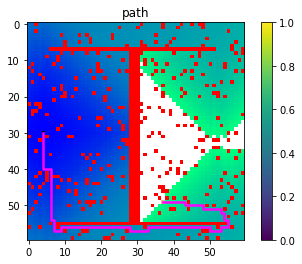

start -2.0 Goal -3.0
start 53 6 Goal 13 4


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 52 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 52 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


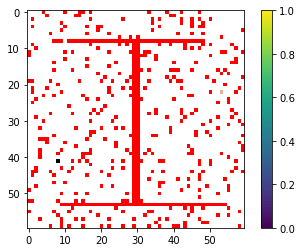

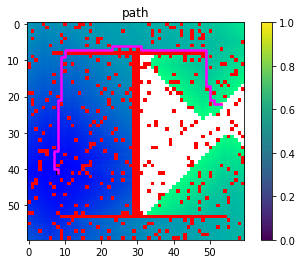

start -2.0 Goal -3.0
start 57 51 Goal 33 6


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


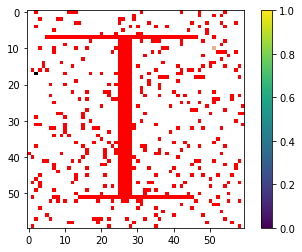

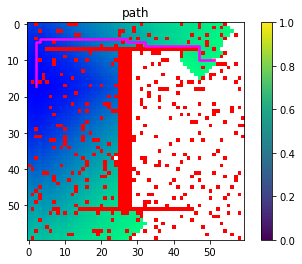

start -2.0 Goal -3.0
start 2 41 Goal 33 3


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 50 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 50 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


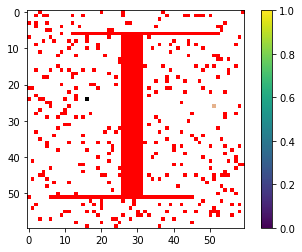

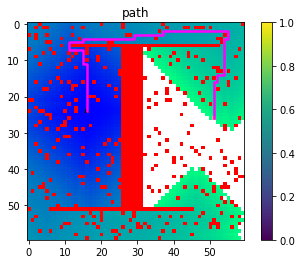

start -2.0 Goal -3.0
start 42 3 Goal 7 14


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


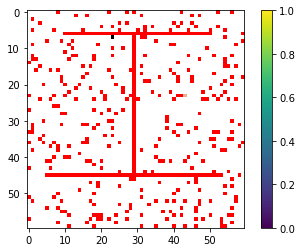

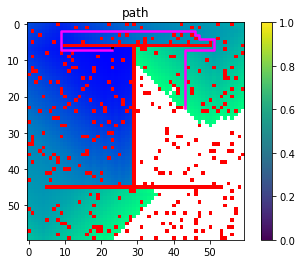

start -2.0 Goal -3.0
start 52 0 Goal 54 24


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 49 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 49 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


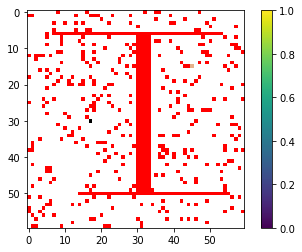

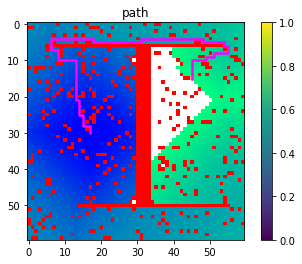

start -2.0 Goal -3.0
start 38 30 Goal 50 54


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 44 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 44 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


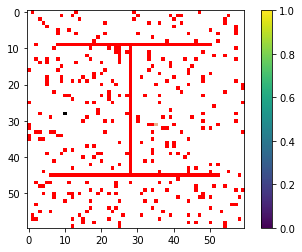

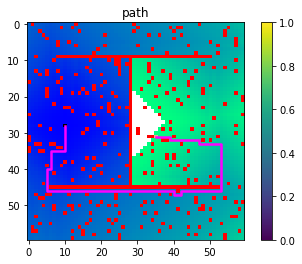

start -2.0 Goal -3.0
start 17 22 Goal 47 48


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 53 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 53 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


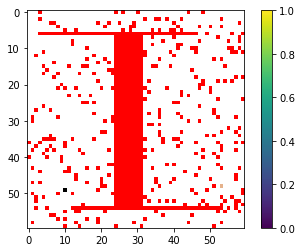

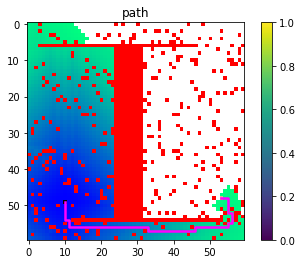

start -2.0 Goal -3.0
start 16 43 Goal 47 38


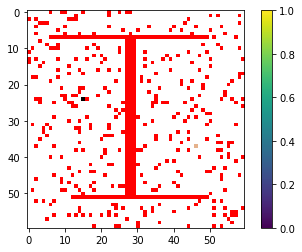

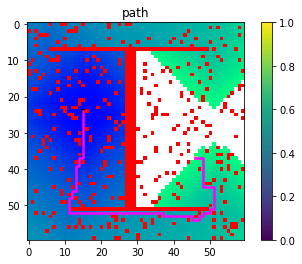

start -2.0 Goal -3.0
start 36 50 Goal 13 21


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(9, 46 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(9, 46 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


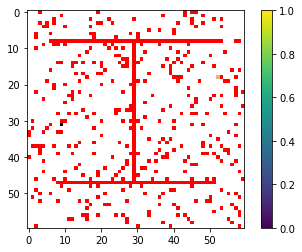

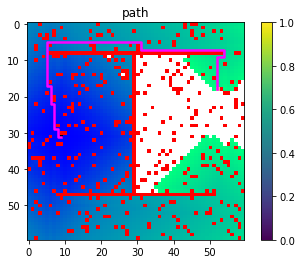

start -2.0 Goal -3.0
start 47 59 Goal 10 58


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 45 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 45 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


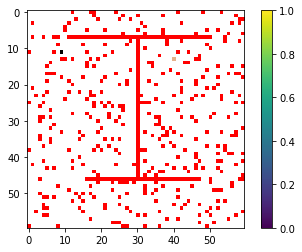

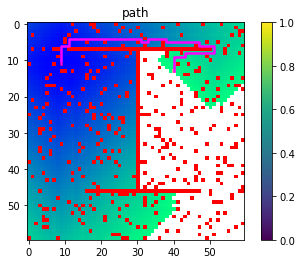

start -2.0 Goal -3.0
start 19 2 Goal 40 36


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(7, 47 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(7, 47 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


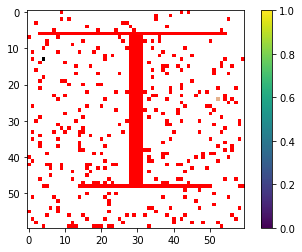

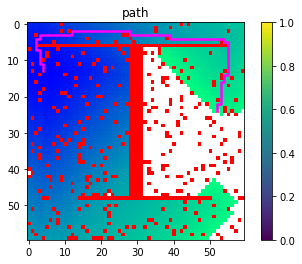

start -2.0 Goal -3.0
start 15 11 Goal 56 47


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(8, 51 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(8, 51 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


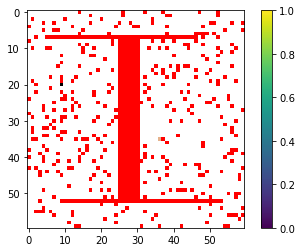

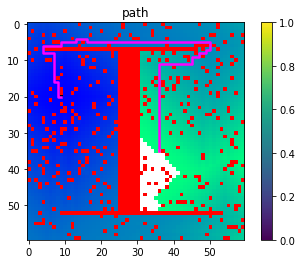

start -2.0 Goal -3.0
start 48 0 Goal 46 5


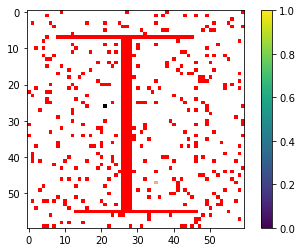

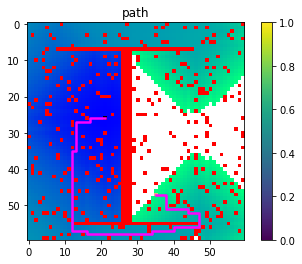

start -2.0 Goal -3.0
start 15 16 Goal 19 58


C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:51: DeprecationWarning: This function is deprecated. Please call randint(10, 51 + 1) instead
  startp = [np.random.random_integers(0, size_x//2 - 4), np.random.random_integers(ybot+1, ytop-1)]
C:\Users\Selam\AppData\Local\Temp\ipykernel_2492\3235453617.py:54: DeprecationWarning: This function is deprecated. Please call randint(10, 51 + 1) instead
  goalp = [np.random.random_integers(size_x//2 + 4, size_x - 3), np.random.random_integers(ybot+1, ytop-1)]


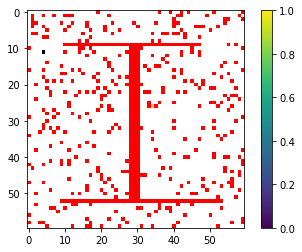

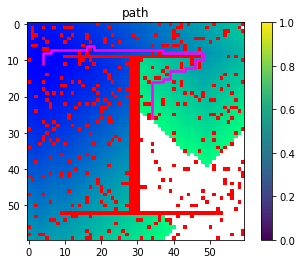

[2011, 1989, 1970, 2903, 2576, 2609, 2513, 1606, 2299, 2153, 2725, 3086, 1439, 2387, 2452, 2102, 2255, 2781, 2417, 2388]
[60, 92, 86, 114, 117, 109, 99, 69, 100, 91, 110, 107, 67, 97, 95, 72, 92, 113, 100, 84]
[1.052976369857788, 0.9551541805267334, 0.8508646488189697, 1.216282606124878, 1.0171899795532227, 1.151031732559204, 0.9850332736968994, 0.5958404541015625, 1.0414464473724365, 0.8390610218048096, 1.2728991508483887, 1.4939560890197754, 0.7302370071411133, 1.0646073818206787, 1.0333876609802246, 0.7667007446289062, 0.8666627407073975, 1.0753517150878906, 1.0076758861541748, 0.9289827346801758]
2333.05
93.7
0.9972670912742615
400.9747467110616
16.15580391066938
0.19589500705833646


In [12]:
import time
import numpy
expanded_obstacle_ctr=[]
path_obstacle_taken=[]
time_obstacle_taken=[]

for i in range(20):
    map3, info=generateMap2d_obstacle([60, 60])
    start=time.time()
    exp_obstacle_nodes, path_bfs2=bfs_search(map3)
    stop=time.time()
    #print(type(exp_cntr),type(path))
    expanded_obstacle_ctr.append(exp_obstacle_nodes)
    path_obstacle_taken.append(path_bfs2)
    timed=stop-start
    time_obstacle_taken.append(timed) 


expanded_nodes_obstacle_mean= numpy.mean(expanded_obstacle_ctr)
path_obstacle_mean= numpy.mean(path_obstacle_taken)
time_obstacle_mean= numpy.mean(time_obstacle_taken)
expanded_nodes_obstacle_std_dev = numpy.std(expanded_obstacle_ctr)
path_mean_obstacle_std_dev= numpy.std(path_obstacle_taken)
time_mean_obstacle_std_dev= numpy.std(time_obstacle_taken)

print(expanded_obstacle_ctr)
print(path_obstacle_taken)
print(time_obstacle_taken)
print(expanded_nodes_obstacle_mean)
print(path_obstacle_mean)
print(time_obstacle_mean)
print(expanded_nodes_obstacle_std_dev)
print(path_mean_obstacle_std_dev)
print(time_mean_obstacle_std_dev)

